In [ ]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured55r56y6y

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#fo = pd.read_csv('clean_File.csv') #read the data
#df = pd.read_csv('Cclean_File.csv') #create data frame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataKualitatif.xlsx')
df.head()

,Pengalaman Belajar,Tantangan,Strategi Belajar,Masukan,Device Preferences,Personal Goals,Saran,Informasi Visual
0,pada tahun 2020 saya mau menyerah kerena darin...,mencari nilai sangat sulit dan tidak ada nilai...,mencari dan memilih jawaban yang cocok dengan ...,Masukan terkait penyelenggaraan kelas (yang An...,Ponsel,mendapatkan hasil yang baik,kalau tugas jangan dimasukan diskusi,berharap seterus daring
1,Semuanya mengesankan hingga di semester ini.,Kendala pada jaringan internet.,Dibaca dan dipahami dulu setiap bab yg akan di...,semoga tetap daring kedepan daring lebih dianj...,komputer,Mengetahui lebih tentang pengaplikasian ilmu m...,Perlu ada peningkatan lagi dengan mengadakan p...,Sangat baik buat Saya dikarenakan dengan adany...
2,Mendapatkn IP bagus,"Ketika UAS, kadang takut dalam mengerjakan kar...","Membaca modul, melihat tutorial dengan youtube",Masukkannya paling ada hanya ingin minta tamba...,Laptop,Agar nilai-nilai yang telah diajarkan dalam ma...,"Tetap berkembang dan maju terus UT, sejauh ini...",Sangat efektik karena cukup membantu banyak or...
3,Pengalaman belajar saya lumayan menyenangkan p...,Sudah saya jelaskan diatas halangan atau hamba...,Strategi chat mahasiswa satu jurusan atau grup...,Lebih ditingkatkan lagi untuk tutor agar aktif...,Laptop,Dapat meningkatkan IP. Agar lulus Cumlaude,Mungkin untuk para tutor lebih aktif lagi dala...,Menurut saya UT sudah bagus
4,Tidak ada,Jaringan ketika awal kuliah,Mengerjakan diskusi tepat waktu,-,Laptop,Tujuan saya adalah untuk mempelajari lebih dal...,Saran saya untuk universitas terbuka di cabang...,Materi yg diberikan harus jelas Uas yg diberik...


In [ ]:
df.shape

(381, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pengalaman Belajar  209 non-null    object
 1   Tantangan           209 non-null    object
 2   Strategi Belajar    209 non-null    object
 3   Masukan             210 non-null    object
 4   Device Preferences  381 non-null    object
 5   Personal Goals      229 non-null    object
 6   Saran               229 non-null    object
 7   Informasi Visual    229 non-null    object
dtypes: object(8)
memory usage: 23.9+ KB


In [ ]:
df_new = df[df['Pengalaman Belajar'].notnull()]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
df_new['Pengalaman Belajar'] = df_new['Pengalaman Belajar'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_new['Pengalaman Belajar'].head()

0    2020 menyerah kerena daring nilai A daring sem...
1                   Semuanya mengesankan semester ini.
2                                  Mendapatkn IP bagus
3    Pengalaman belajar lumayan menyenangkan positi...
4                                                Tidak
Name: Pengalaman Belajar, dtype: object

In [ ]:
#lower text
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df_new['Pengalaman Belajar'] = df_new['Pengalaman Belajar'].str.lower()


print('Case Folding Result : \n')
print(df_new['Pengalaman Belajar'].head(5))


Case Folding Result : 

0    2020 menyerah kerena daring nilai a daring sem...
1                   semuanya mengesankan semester ini.
2                                  mendapatkn ip bagus
3    pengalaman belajar lumayan menyenangkan positi...
4                                                tidak
Name: Pengalaman Belajar, dtype: object


In [ ]:
import string 
import re #regex library
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df_new['Pengalaman Belajar'] = df_new['Pengalaman Belajar'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df_new['Pengalaman Belajar'] = df_new['Pengalaman Belajar'].apply(remove_punctuation)

In [ ]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_new['Pengalaman Belajar'] = df_new['Pengalaman Belajar'].apply(remove_singl_char)

In [ ]:
text = df_new['Pengalaman Belajar']
text_list =  [i.split() for i in text]
#text_list =  [i for i in text]
print(len(text_list))
print(text_list)

209
[['menyerah', 'kerena', 'daring', 'nilai', 'daring', 'semangat', 'kuliah', 'muncul'], ['semuanya', 'mengesankan', 'semester', 'ini'], ['mendapatkn', 'ip', 'bagus'], ['pengalaman', 'belajar', 'lumayan', 'menyenangkan', 'positif', 'nya', 'belajar', 'berdiskusi', 'berbagi', 'permasalahan', 'kesulitan', 'yg', 'dihadapi', 'mengikuti', 'tuton', 'mahasiswa', 'yg', 'angaktan', 'jurusan', 'aaya', 'mengevaluasi', 'menghadapi', 'uas', 'tugas', 'dll', 'negatif', 'nya', 'halangan', 'dibagian', 'sinyal', 'internet', 'membuka', 'link', 'ut', 'kadang', 'eror', 'kadang', 'gk', 'kebuka', 'kadang', 'lola', 'dsb'], ['tidak'], ['nilai'], ['tertantang', 'belajar', 'mandiri'], ['waktunya', 'fleksibel', 'pekerja', 'pabrik'], ['tugas', 'dimanapun', 'sesuai', 'tetapkan', 'fleksibel', 'mengatur'], ['pelajarannya'], ['mendapat', 'nilai', 'memuaskan'], ['lebih', 'menarik', 'mata', 'kuliah', 'mudah', 'dipahami'], ['saat', 'teman', 'mempresentasikan', 'pembuatan', 'websitesaya', 'tertarik'], ['awalnya', 'bingung

In [ ]:
#di twitter, yg, dn, sy, -- > masukkan di stopwords, sastrawi buat stopwords 

In [ ]:
#normalisasi : --> yg, dn, sy, dll. 

In [ ]:
#https://yunusmuhammad007.medium.com/text-preprocessing-menggunakan-pandas-nltk-dan-sastrawi-untuk-large-dataset-5fb3c0a88571

In [ ]:
#masi salah hasil frekuensi nya
# NLTK calc frequency distribution
from nltk.probability import FreqDist
def freqDist_wrapper(text):
    return FreqDist(text)

df_new['Pengalaman Belajar'] = df_new['Pengalaman Belajar'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
df_new['Pengalaman Belajar'].head().apply(lambda x : x.most_common())

Frequency Tokens : 



0    [( , 9), (a, 8), (n, 7), (e, 5), (i, 5), (r, 4...
1    [(e, 6), (n, 5), (s, 4), (a, 4), (m, 3), ( , 3...
2    [(a, 3), (n, 2), (p, 2), ( , 2), (m, 1), (e, 1...
3    [(a, 53), ( , 41), (n, 29), (e, 19), (i, 19), ...
4             [(t, 1), (i, 1), (d, 1), (a, 1), (k, 1)]
Name: Pengalaman Belajar, dtype: object

In [ ]:
#stringdata=' '.join([str(item) for item in text_list])
#print(stringdata)

In [ ]:
#pip install Sastrawi

In [ ]:
# import StemmerFactory class
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
#factory = StemmerFactory()
#stemmer = factory.create_stemmer()
# stemming process
#sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
#output   = stemmer.stem(stringdata)
#print(output)

In [ ]:
# Python code to convert string to list
#def Convert(string):
#    li = list(string.split("-"))
#    return li
  
# Driver code 
#list_text =  Convert(output)  
#print(list_text)

In [ ]:
#text_list =  [i.split() for i in list_text]

In [ ]:
#print(text_list)

In [ ]:
#nltk.download('punkt')

In [ ]:
#https://sites.unpad.ac.id/widodo/2021/03/09/nlp-dengan-python/

In [ ]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(58 unique tokens: ['daring', 'kuliah', 'nilai', 'mengesankan', 'berdiskusi']...)


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

209
[(36, 1), (43, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

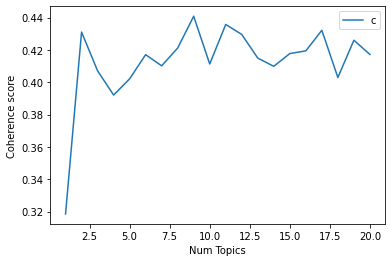

In [ ]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.319
Num Topics = 2  has Coherence Value of 0.431
Num Topics = 3  has Coherence Value of 0.407
Num Topics = 4  has Coherence Value of 0.392
Num Topics = 5  has Coherence Value of 0.402
Num Topics = 6  has Coherence Value of 0.417
Num Topics = 7  has Coherence Value of 0.41
Num Topics = 8  has Coherence Value of 0.421
Num Topics = 9  has Coherence Value of 0.441
Num Topics = 10  has Coherence Value of 0.411
Num Topics = 11  has Coherence Value of 0.436
Num Topics = 12  has Coherence Value of 0.43
Num Topics = 13  has Coherence Value of 0.415
Num Topics = 14  has Coherence Value of 0.41
Num Topics = 15  has Coherence Value of 0.418
Num Topics = 16  has Coherence Value of 0.419
Num Topics = 17  has Coherence Value of 0.432
Num Topics = 18  has Coherence Value of 0.403
Num Topics = 19  has Coherence Value of 0.426
Num Topics = 20  has Coherence Value of 0.417


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    # yg belum remove Yang, yg,trus lower text

Topic: 0 Word: 0.072*"kuliah" + 0.055*"pengalaman" + 0.053*"yg" + 0.048*"hal" + 0.042*"online" + 0.042*"mudah" + 0.033*"dipahami" + 0.032*"nya" + 0.032*"berinteraksi" + 0.030*"menyenangkan"
Topic: 1 Word: 0.062*"daring" + 0.062*"tutor" + 0.059*"sangat" + 0.052*"kuliah" + 0.048*"mandiri" + 0.039*"aktif" + 0.036*"nilai" + 0.032*"menanggapi" + 0.032*"pembelajaran" + 0.032*"dan"
Topic: 2 Word: 0.072*"daring" + 0.070*"lebih" + 0.064*"mengesankan" + 0.047*"pembelajaran" + 0.044*"mengikuti" + 0.044*"dosen" + 0.038*"materi" + 0.038*"online" + 0.037*"mengatur" + 0.036*"mudah"
Topic: 3 Word: 0.092*"dosen" + 0.067*"pengalaman" + 0.060*"tugas" + 0.055*"mahasiswa" + 0.050*"yg" + 0.047*"mendapatkan" + 0.040*"online" + 0.038*"menyenangkan" + 0.037*"teman" + 0.035*"memiliki"
Topic: 4 Word: 0.073*"menyenangkan" + 0.067*"pengalaman" + 0.061*"ut" + 0.060*"mudah" + 0.052*"daring" + 0.047*"sesuai" + 0.038*"paham" + 0.037*"memuaskan" + 0.037*"mengesankan" + 0.036*"kerja"
Topic: 5 Word: 0.092*"diskusi" + 0.0

In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)]) #ubah2 yg ini
df=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_topic_20.csv")
#df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2_50_clean.csv")
print(df)


None


In [ ]:
#ini dilakukan jika module belum tersedia
!pip install pyLDAvis
#!apt-get -qq install -y pyLDAvis

In [ ]:
#import gensim
import pyLDAvis
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, '/content/drive/MyDrive/Colab Notebooks/lda-gensim_clean_kualitatif1.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.050884 -0.046264       1        1  13.751089
2     -0.008061  0.004758       2        1  13.131770
1      0.073152 -0.046435       3        1  12.038193
5      0.029695  0.076665       4        1  11.993466
6     -0.164961  0.052213       5        1  11.100551
3      0.011723 -0.030506       6        1  10.661228
0     -0.054782 -0.043476       7        1  10.205638
4     -0.015476 -0.080706       8        1   8.634327
8      0.077826  0.113751       9        1   8.483738, topic_info=            Term      Freq     Total Category  logprob  loglift
40         waktu  5.000000  5.000000  Default  30.0000  30.0000
19      mengatur  4.000000  4.000000  Default  29.0000  29.0000
7   menyenangkan  4.000000  4.000000  Default  28.0000  28.0000
41          baik  5.000000  5.000000  Default  27.0000  27.0000
27         teman  7.000000  7.000000  Defau